In [ ]:
###### import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('DATA.csv')
data

In [13]:
data=data.dropna()
data.shape

(24369, 2)

In [12]:
#drop rows with less than 5 words
data = data[data['text'].str.split().str.len().ge(5)]

In [15]:
data[data['label']==1].shape,data[data['label']==0].shape,data[data['label']==-1].shape

((7614, 2), (10271, 2), (6484, 2))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(data['text']).toarray()

In [6]:
X.shape

(25024, 36552)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.33, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Naive Bayes

In [9]:
#vectorizer = CountVectorizer(min_df=5).fit(x_train)
#X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


In [10]:
mnb = MultinomialNB(alpha=.01)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [11]:
#X_test = vectorizer.transform(x_test)
mnb_y_pred = mnb.predict(X_test)

In [12]:
mnb_score = accuracy_score(y_test, mnb_y_pred)
print("Accuracy:   {:.3f}".format(mnb_score))

Accuracy:   0.531


In [13]:
print("Training set score: {:.3f}".format(mnb.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mnb.score(X_test, y_test)))

Training set score: 0.931
Test set score: 0.531


In [14]:
mnb_cfm = confusion_matrix(y_test, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n')

Confusion matrix:
[[1008  874  252]
 [ 687 2238  729]
 [ 282 1048 1140]]



In [15]:
import matplotlib.pyplot as plt
import itertools
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar();

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

In [18]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.622


In [ ]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

#X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.522


In [ ]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.546
Test set score: 0.522


In [ ]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')

Confusion matrix:
[[ 192 1867   75]
 [  34 3409  211]
 [  10 1753  707]]



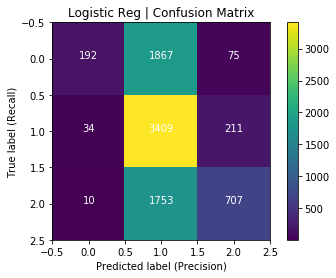

In [ ]:
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

# DecisionTreeClassifier 

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def train_using_gini(X_train, X_test, y_train): 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
    random_state = 100,max_depth=3, min_samples_leaf=5) 

    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
	criterion = "entropy", random_state = 100, 
	max_depth = 3, min_samples_leaf = 5) 
	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", classification_report(y_test, y_pred)) 

In [ ]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 

# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 

print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[   0 2029  105]
 [   0 3464  190]
 [   0 2013  457]]
Accuracy :  47.48123032211189


C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Report :                precision    recall  f1-score   support

          -1       0.00      0.00      0.00      2134
           0       0.46      0.95      0.62      3654
           1       0.61      0.19      0.28      2470

    accuracy                           0.47      8258
   macro avg       0.36      0.38      0.30      8258
weighted avg       0.39      0.47      0.36      8258

Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[   1 2027  106]
 [   0 3463  191]
 [   2 2010  458]]
Accuracy :  47.49333979171712
Report :                precision    recall  f1-score   support

          -1       0.33      0.00      0.00      2134
           0       0.46      0.95      0.62      3654
           1       0.61      0.19      0.28      2470

    accuracy                           0.47      8258
   macro avg       0.47      0.38      0.30      8258
weighted avg       0.47      0.47      0.36      8258



In [ ]:
set(y_pred_gini),set(y_test)

({0, 1}, {-1, 0, 1})

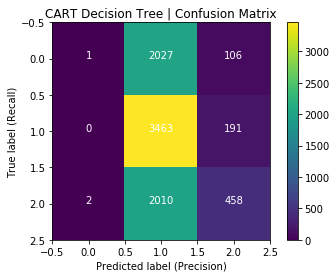

In [ ]:
x=confusion_matrix(y_test, y_pred_entropy)
plt.imshow(x, interpolation='nearest')

for i, j in itertools.product(range(x.shape[0]), range(x.shape[1])):
    plt.text(j, i, x[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('CART Decision Tree | Confusion Matrix')
plt.colorbar();

# Perceptron

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron


In [ ]:
scores = cross_val_score(Perceptron(), X_train, y_train)

C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.590


In [ ]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf_y_pred = clf.predict(X_test)

In [ ]:
clf_score = accuracy_score(y_test, clf_y_pred)
print("Accuracy:   {:.3f}".format(clf_score))

Accuracy:   0.610


In [ ]:
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Training set score: 0.999
Test set score: 0.610


In [ ]:
clf_cfm = confusion_matrix(y_test, clf_y_pred)
print("Confusion matrix:")
print(clf_cfm, end='\n\n')

Confusion matrix:
[[1181  804  149]
 [ 548 2391  715]
 [ 174  827 1469]]



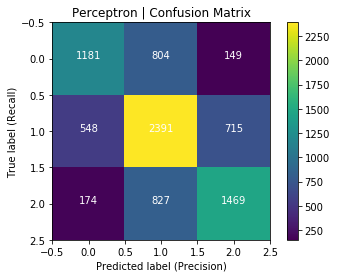

In [ ]:
import matplotlib.pyplot as plt
import itertools
plt.imshow(clf_cfm, interpolation='nearest')

for i, j in itertools.product(range(clf_cfm.shape[0]), range(clf_cfm.shape[1])):
    plt.text(j, i, clf_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Perceptron | Confusion Matrix')
plt.colorbar();

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(), X_train, y_train)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Apar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

In [ ]:
clf_score = accuracy_score(y_test, clf_y_pred)
print("Accuracy:   {:.3f}".format(clf_score))

In [ ]:
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [ ]:
clf_cfm = confusion_matrix(y_test, clf_y_pred)
print("Confusion matrix:")
print(clf_cfm, end='\n\n')

In [ ]:
import matplotlib.pyplot as plt
import itertools
plt.imshow(clf_cfm, interpolation='nearest')

for i, j in itertools.product(range(clf_cfm.shape[0]), range(clf_cfm.shape[1])):
    plt.text(j, i, clf_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Random Forest | Confusion Matrix')
plt.colorbar();

# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
scores = cross_val_score(MLPClassifier(), X_train, y_train)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

In [ ]:
clf_score = accuracy_score(y_test, clf_y_pred)
print("Accuracy:   {:.3f}".format(clf_score))

In [ ]:
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [ ]:
clf_cfm = confusion_matrix(y_test, clf_y_pred)
print("Confusion matrix:")
print(clf_cfm, end='\n\n')

In [ ]:
import matplotlib.pyplot as plt
import itertools
plt.imshow(clf_cfm, interpolation='nearest')

for i, j in itertools.product(range(clf_cfm.shape[0]), range(clf_cfm.shape[1])):
    plt.text(j, i, clf_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Neural Networks | Confusion Matrix')
plt.colorbar();